# DATA SCIENCE INTERN @ CODE ALPHA

### AUTHOR : PARVEJ ALAM M. ANSARI

## TASK 1: STOCK PRICE PREDICTION USING LSTM

## The dataset is available at Kaggle: https://finance.yahoo.com/

## Time Series Analysis

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#!pip install -q yfinance

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

for stock in tech_list:
    globals()[stock] = yf.download(stock, period='1y', interval='1d')
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close  \
Date                                                                        
2023-11-22 00:00:00-05:00  144.570007  147.740005  144.570007  146.710007   
2023-11-24 00:00:00-05:00  146.699997  147.199997  145.320007  146.740005   
2023-11-27 00:00:00-05:00  147.529999  149.259995  146.880005  147.729996   
2023-11-28 00:00:00-05:00  146.979996  147.600006  145.529999  147.029999   
2023-11-29 00:00:00-05:00  147.850006  148.539993  145.970001  146.320007   
2023-11-30 00:00:00-05:00  144.759995  146.929993  144.330002  146.089996   
2023-12-01 00:00:00-05:00  146.000000  147.250000  145.550003  147.029999   
2023-12-04 00:00:00-05:00  145.250000  145.350006  142.809998  144.839996   
2023-12-05 00:00:00-05:00  143.550003  148.570007  143.130005  146.880005   
2023-12-06 00:00:00-05:00  147.580002  147.850006  144.279999  144.520004   

                            Adj Close    Volume company_name  
Date                                                          
2023-11-22 00:00:00-05:00  146.710007  45669100       AMAZON  
2023-11-24 00:00:00-05:00  146.740005  22378400       AMAZON  
2023-11-27 00:00:00-05:00  147.729996  53762400       AMAZON  
2023-11-28 00:00:00-05:00  147.029999  42711700       AMAZON  
2023-11-29 00:00:00-05:00  146.320007  40610900       AMAZON  
2023-11-30 00:00:00-05:00  146.089996  65814000       AMAZON  
2023-12-01 00:00:00-05:00  147.029999  39924600       AMAZON  
2023-12-04 00:00:00-05:00  144.839996  48294200       AMAZON  
2023-12-05 00:00:00-05:00  146.880005  46822400       AMAZON  
2023-12-06 00:00:00-05:00  144.520004  39603800       AMAZON

Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a datasetâ€™s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [5]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   168.403905  170.028327  167.045936  168.634422  168.157088   
std     18.618214   18.441247   18.754268   18.580848   18.740693   
min    126.010002  127.769997  124.169998  125.019997  124.325089   
25%    153.534996  155.364998  151.404999  153.840004  153.218475   
50%    173.050003  174.300003  171.800003  173.570007  173.048050   
75%    182.240005  184.004997  180.800003  182.200005  181.875389   
max    196.240005  198.229996  195.279999  196.449997  195.926956   

             Volume  
count  2.510000e+02  
mean   6.113036e+07  
std    1.863393e+07  
min    2.404830e+07  
25%    4.875425e+07  
50%    5.672540e+07  
75%    6.850900e+07  
max    1.601569e+08

We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [6]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-07 00:00:00-05:00 to 2023-12-06 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stockâ€™s closing price is the standard benchmark used by investors to track its performance over time.

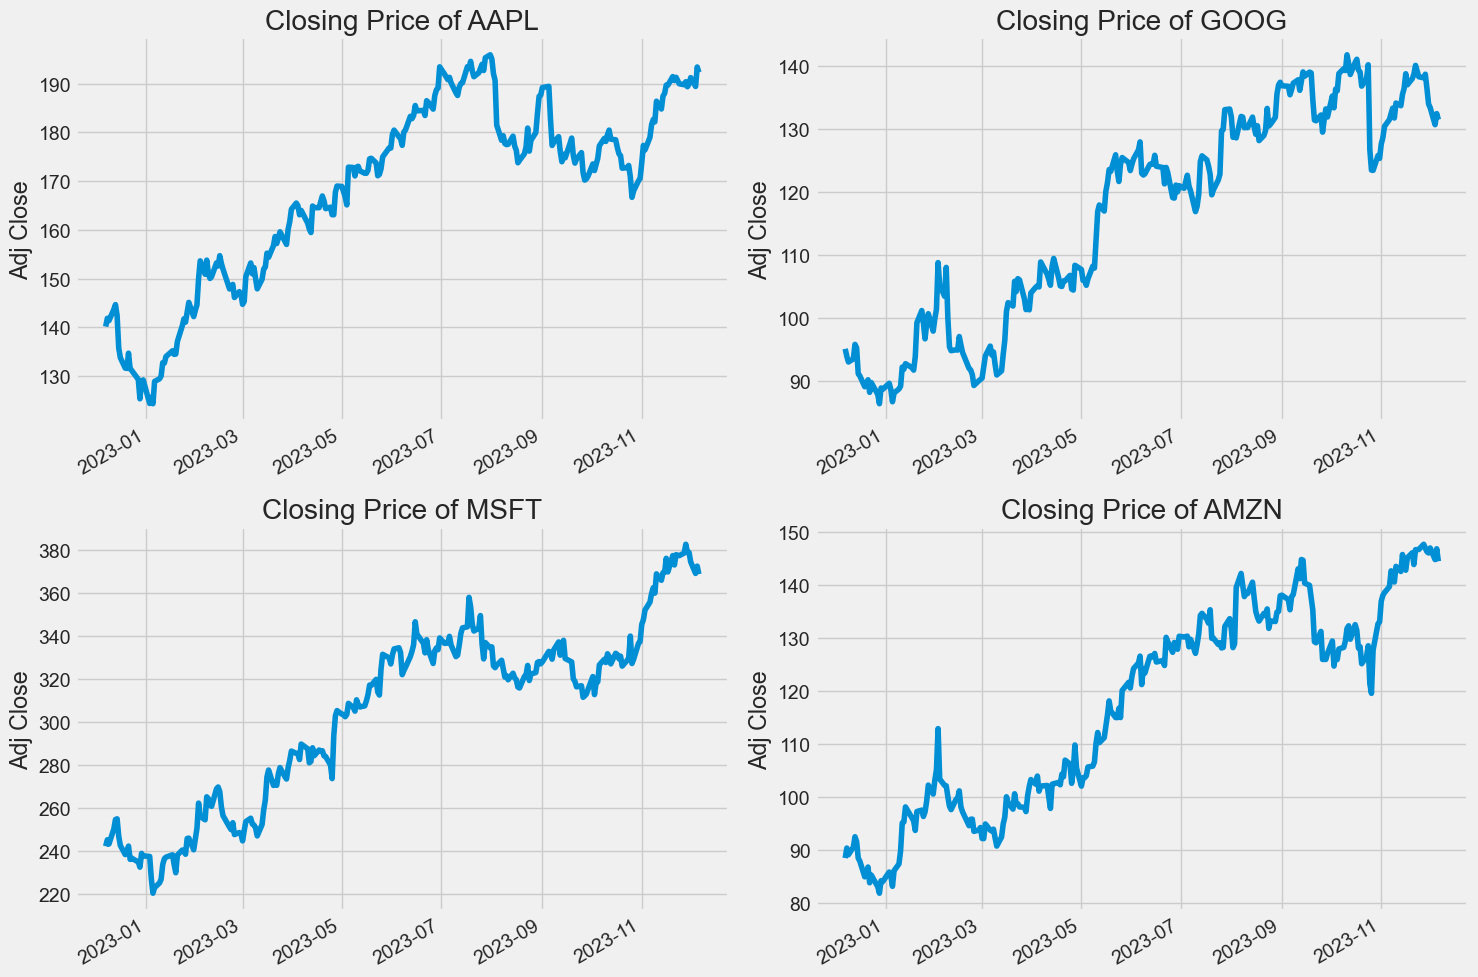

In [7]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

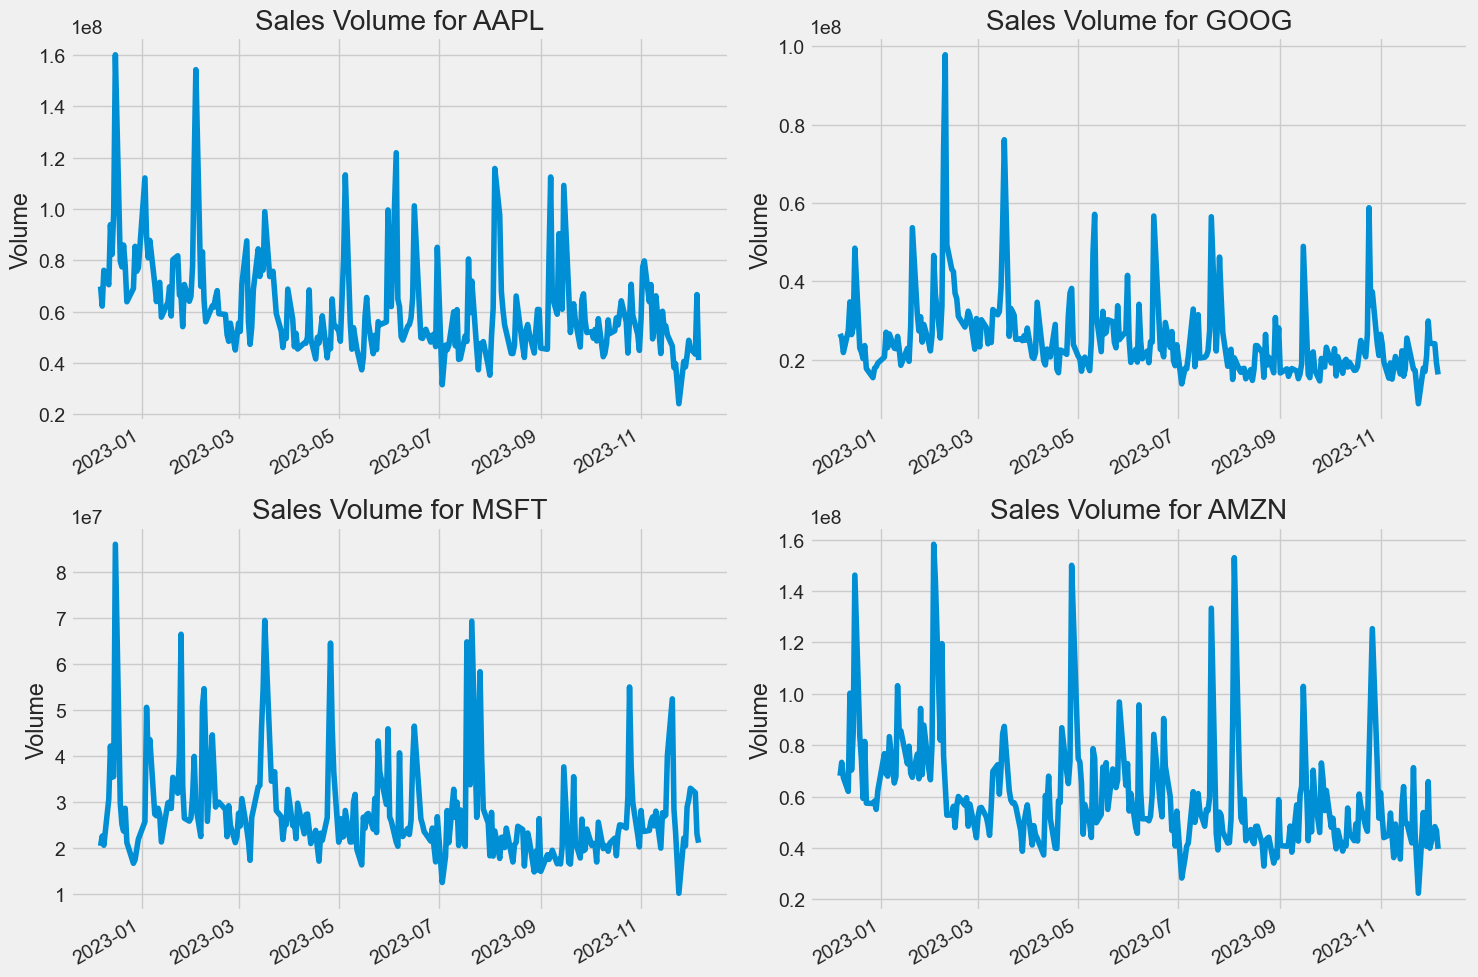

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

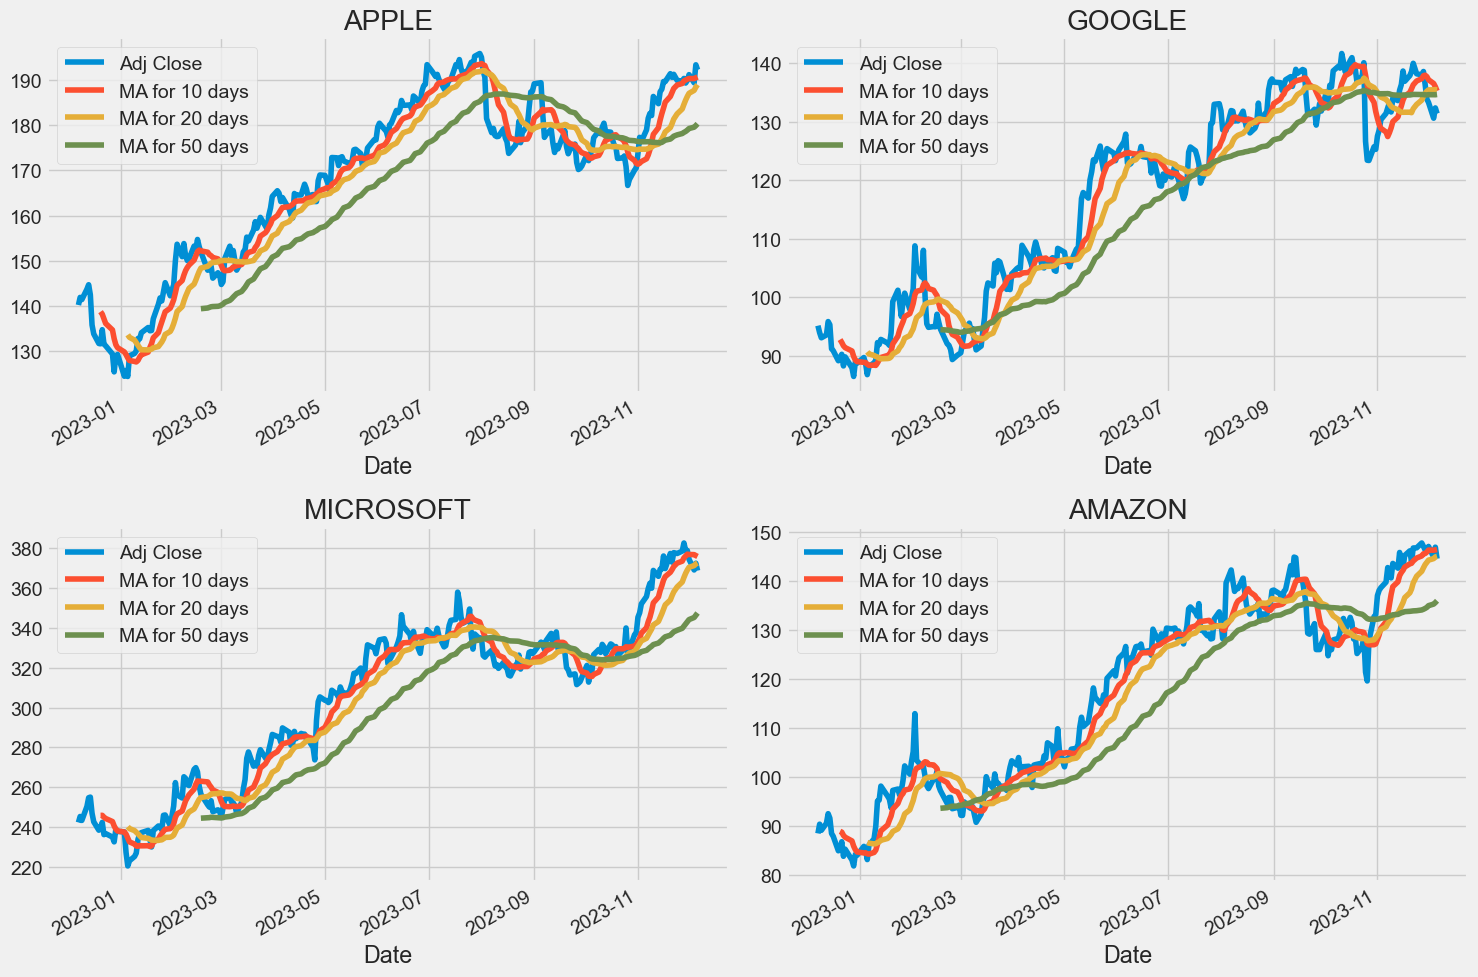

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

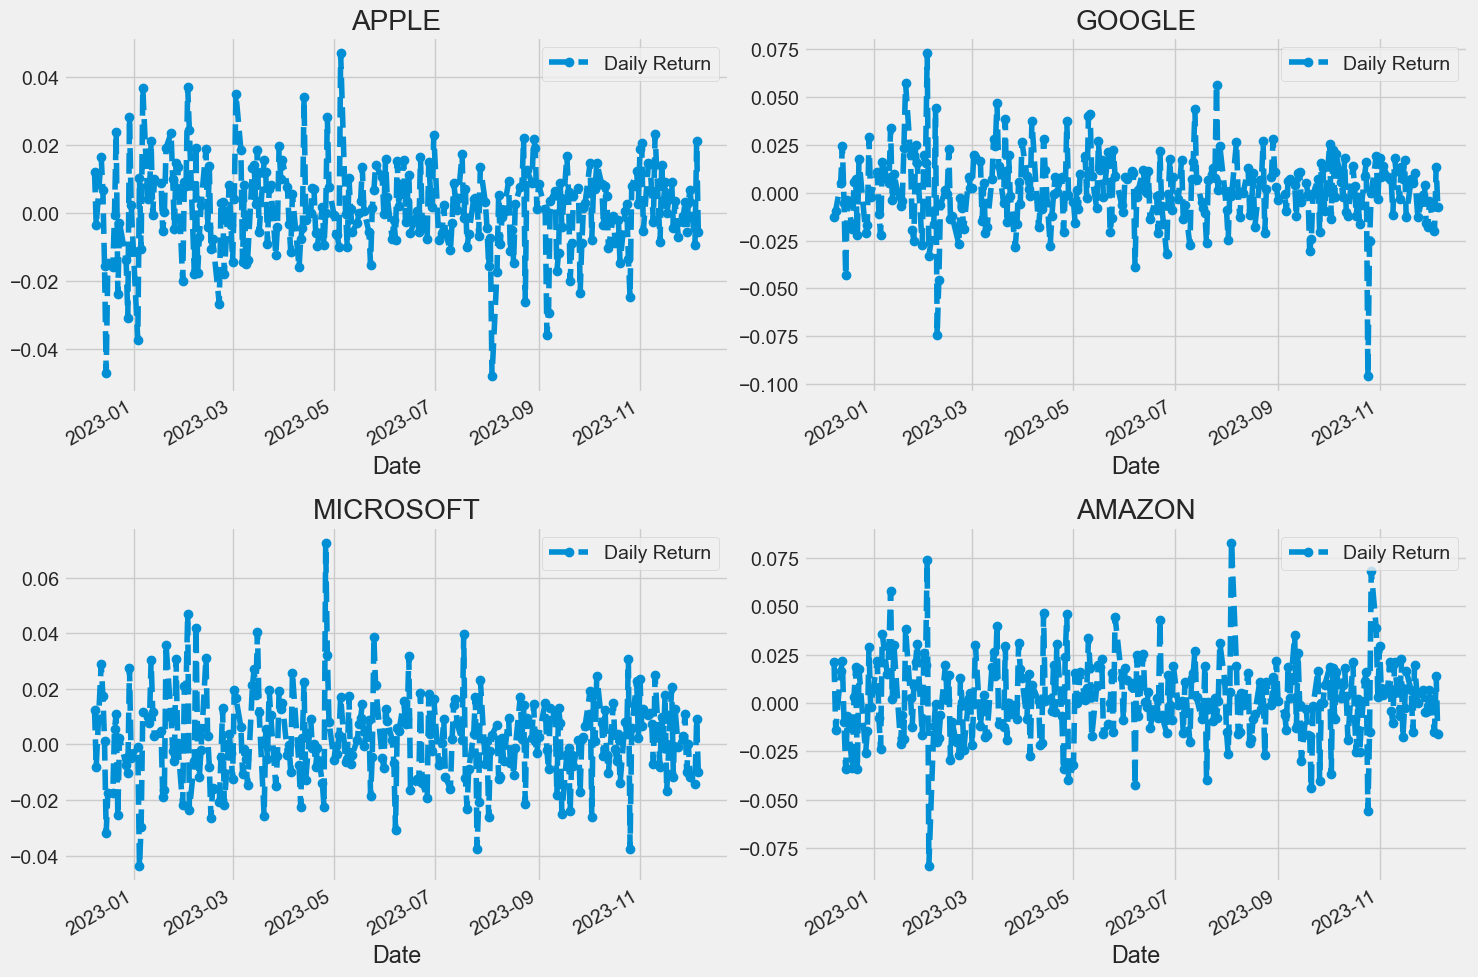

In [10]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

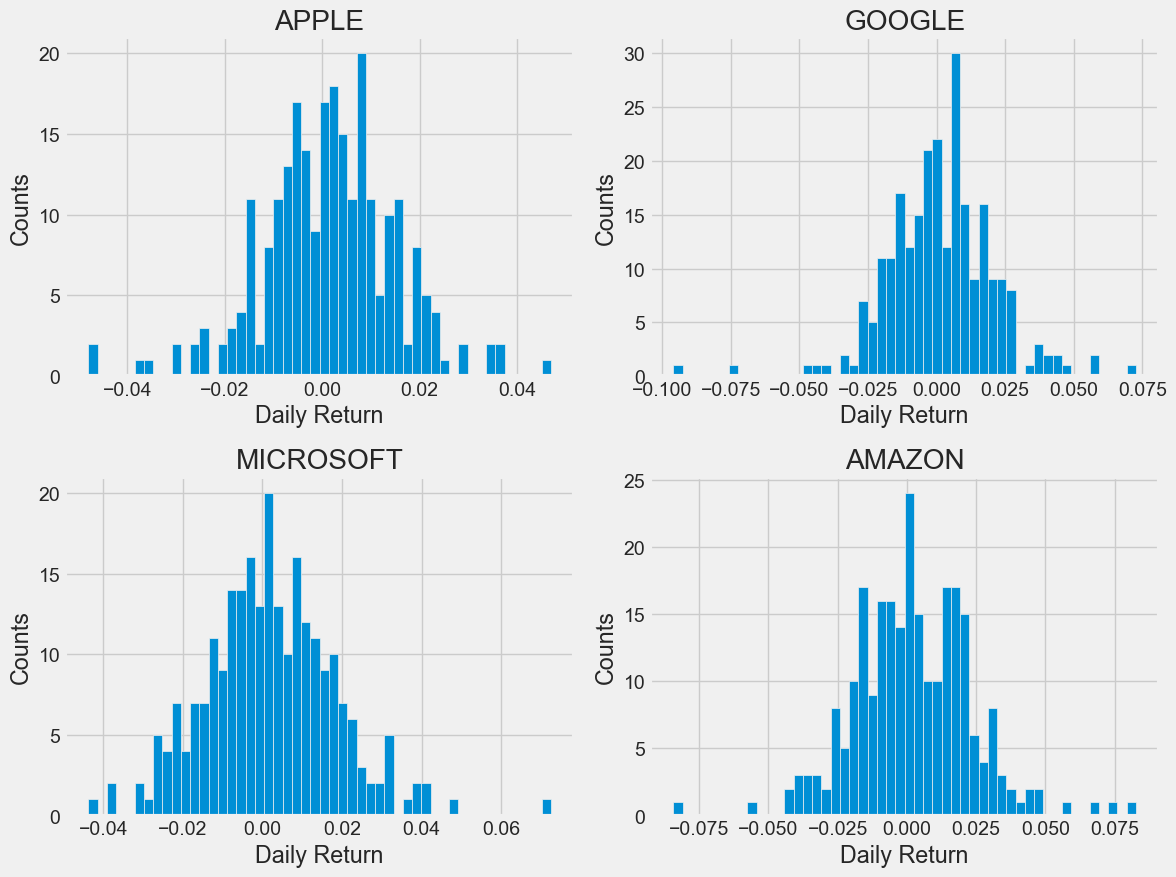

In [11]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesnâ€™t show if x causes y or vice versa â€” or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, period='1y', interval='1d')['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


AAPL      AMZN      GOOG      MSFT
Date                                                             
2022-12-07 00:00:00-05:00       NaN       NaN       NaN       NaN
2022-12-08 00:00:00-05:00  0.012133  0.021366 -0.012612  0.012399
2022-12-09 00:00:00-05:00 -0.003435 -0.013946 -0.009367 -0.008003
2022-12-12 00:00:00-05:00  0.016390  0.016388  0.005265  0.028889
2022-12-13 00:00:00-05:00  0.006783  0.021425  0.024476  0.017465

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

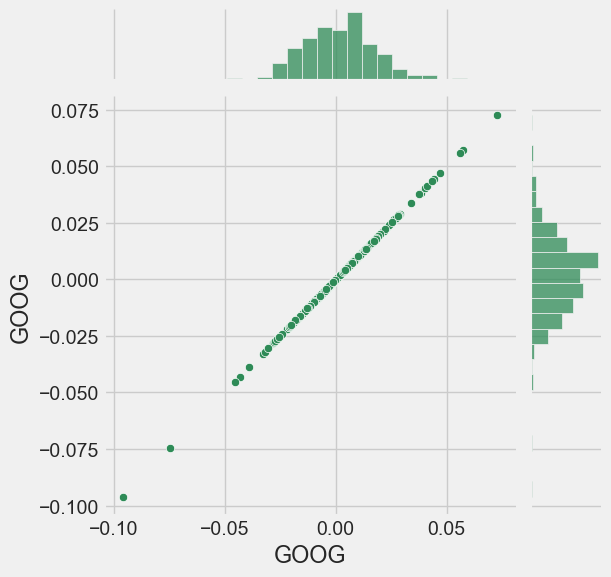

In [13]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')
plt.show()

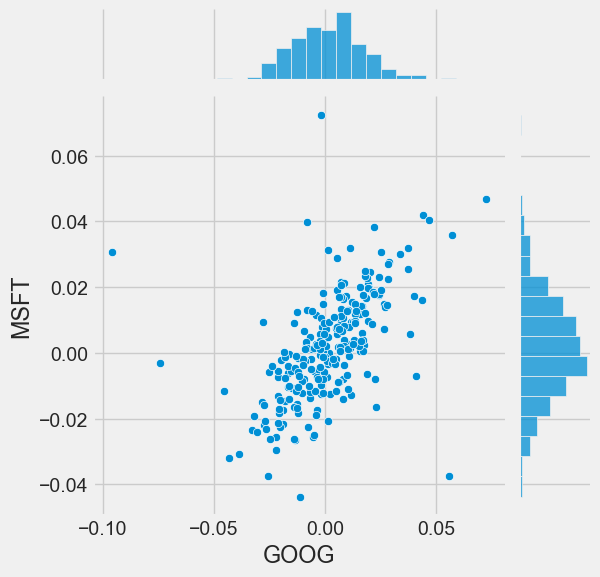

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')
plt.show()

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

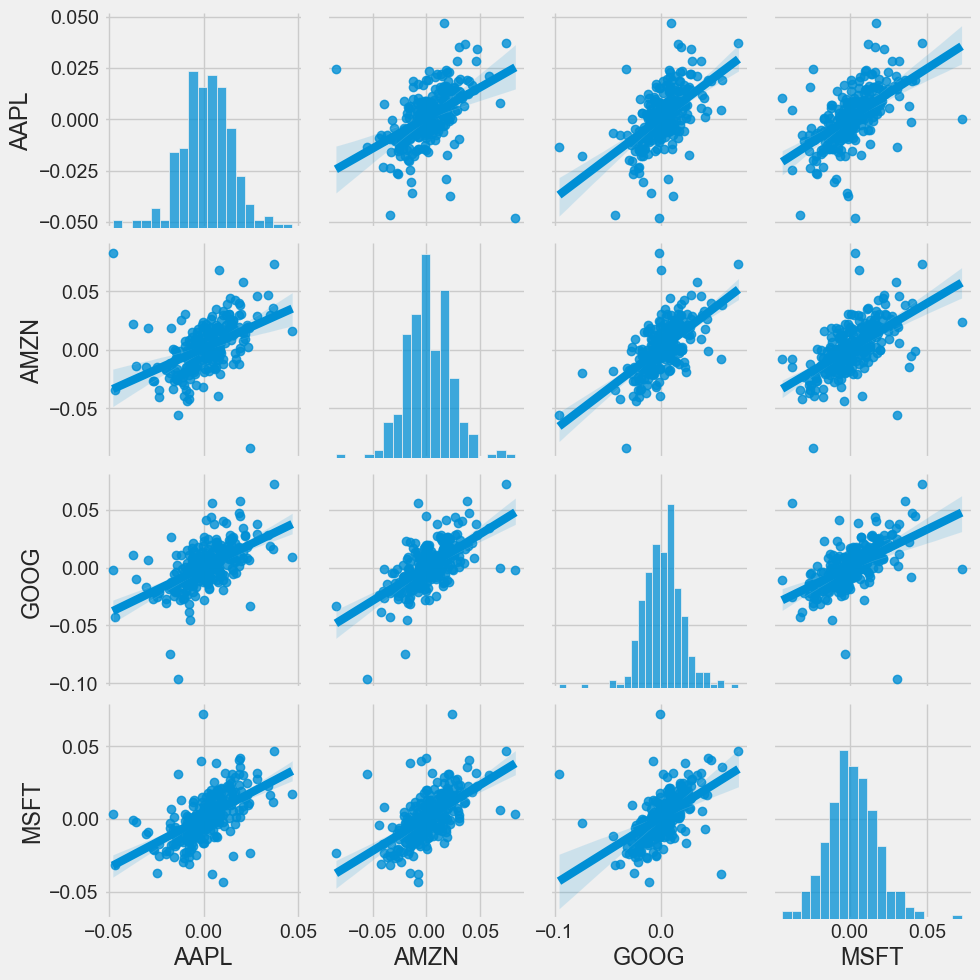

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')
plt.show()

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

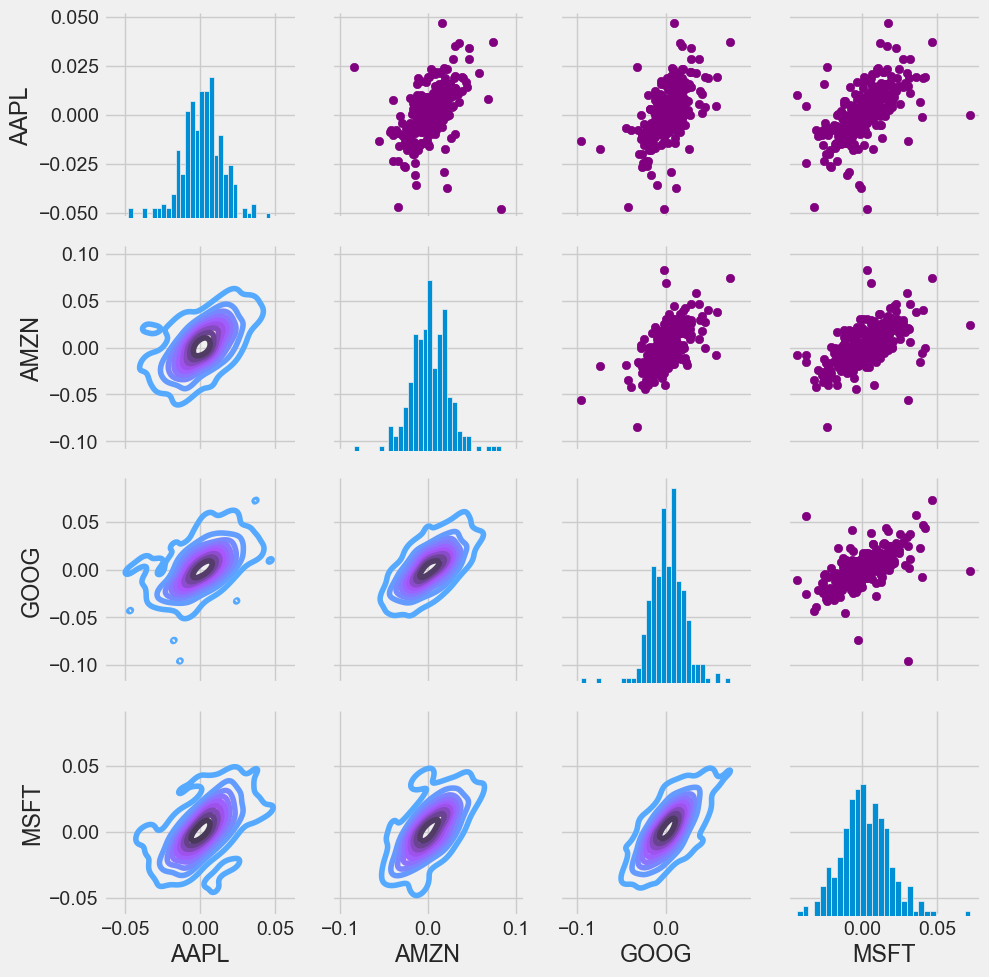

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)
plt.show()

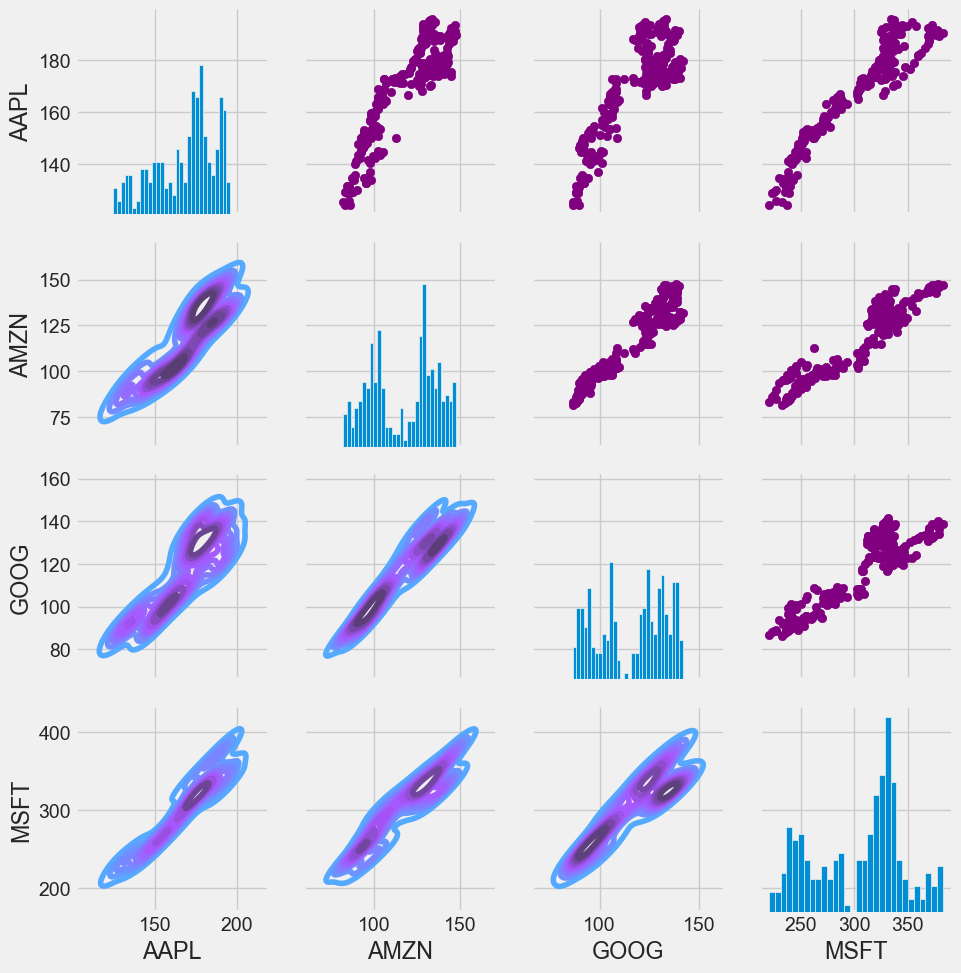

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)
plt.show()

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

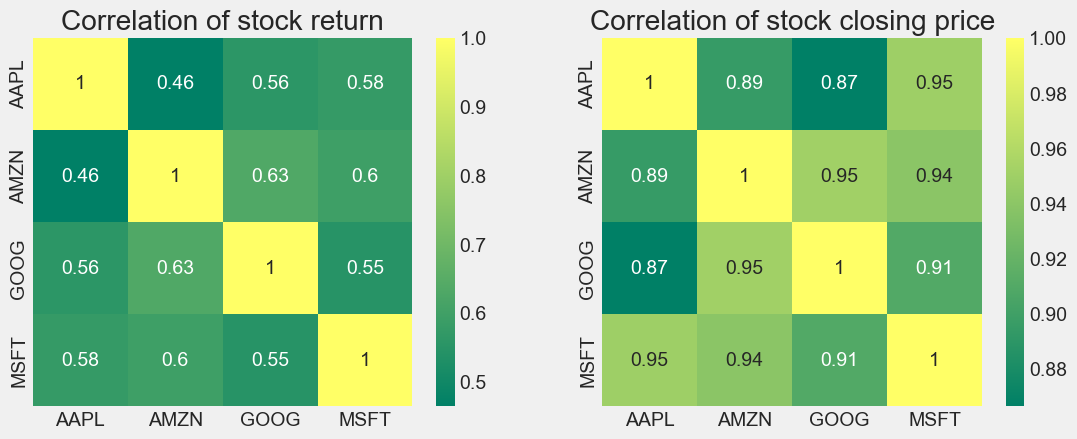

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')
plt.show()

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

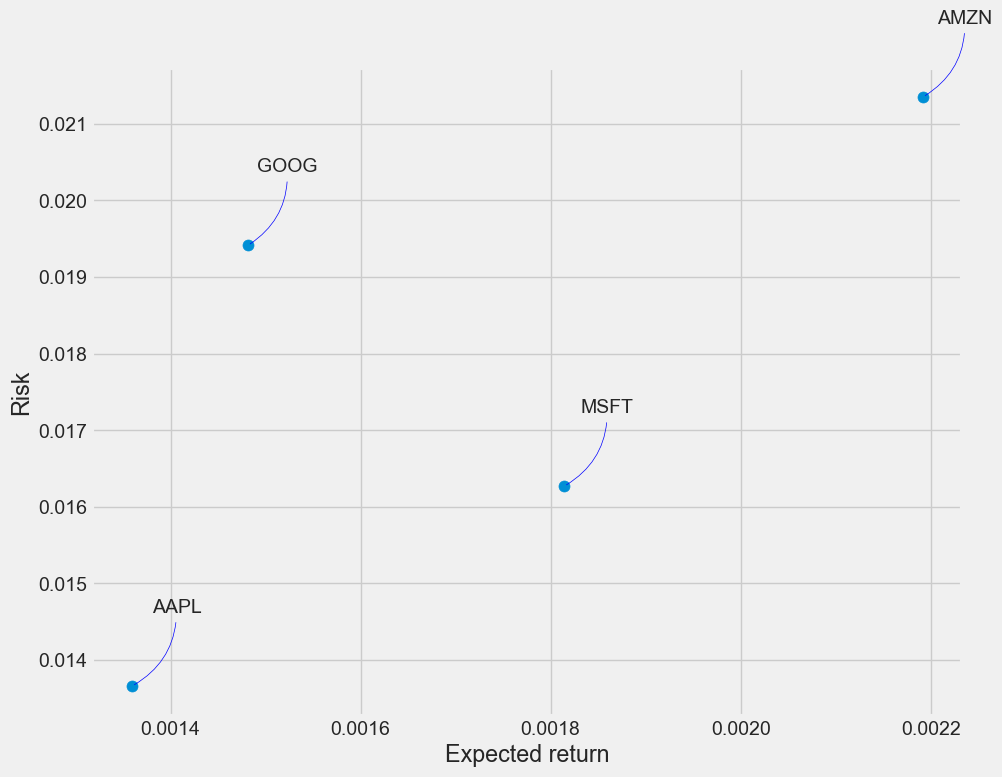

In [19]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [20]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', period='1y', interval='1d')
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close  \
Date                                                                        
2022-12-07 00:00:00-05:00  142.190002  143.369995  140.000000  140.940002   
2022-12-08 00:00:00-05:00  142.360001  143.520004  141.100006  142.649994   
2022-12-09 00:00:00-05:00  142.339996  145.570007  140.899994  142.160004   
2022-12-12 00:00:00-05:00  142.699997  144.500000  141.059998  144.490005   
2022-12-13 00:00:00-05:00  149.500000  149.970001  144.240005  145.470001   
...                               ...         ...         ...         ...   
2023-11-30 00:00:00-05:00  189.839996  190.320007  188.190002  189.949997   
2023-12-01 00:00:00-05:00  190.330002  191.559998  189.229996  191.240005   
2023-12-04 00:00:00-05:00  189.979996  190.050003  187.449997  189.429993   
2023-12-05 00:00:00-05:00  190.210007  194.399994  190.179993  193.419998   
2023-12-06 00:00:00-05:00  194.449997  194.759995  192.110001  192.320007   

                            Adj Close    Volume  
Date                                             
2022-12-07 00:00:00-05:00  140.156586  69721100  
2022-12-08 00:00:00-05:00  141.857086  62128300  
2022-12-09 00:00:00-05:00  141.369827  76097000  
2022-12-12 00:00:00-05:00  143.686859  70462700  
2022-12-13 00:00:00-05:00  144.661423  93886200  
...                               ...       ...  
2023-11-30 00:00:00-05:00  189.949997  48794400  
2023-12-01 00:00:00-05:00  191.240005  45679300  
2023-12-04 00:00:00-05:00  189.429993  43389500  
2023-12-05 00:00:00-05:00  193.419998  66628400  
2023-12-06 00:00:00-05:00  192.320007  41060000  

[251 rows x 6 columns]

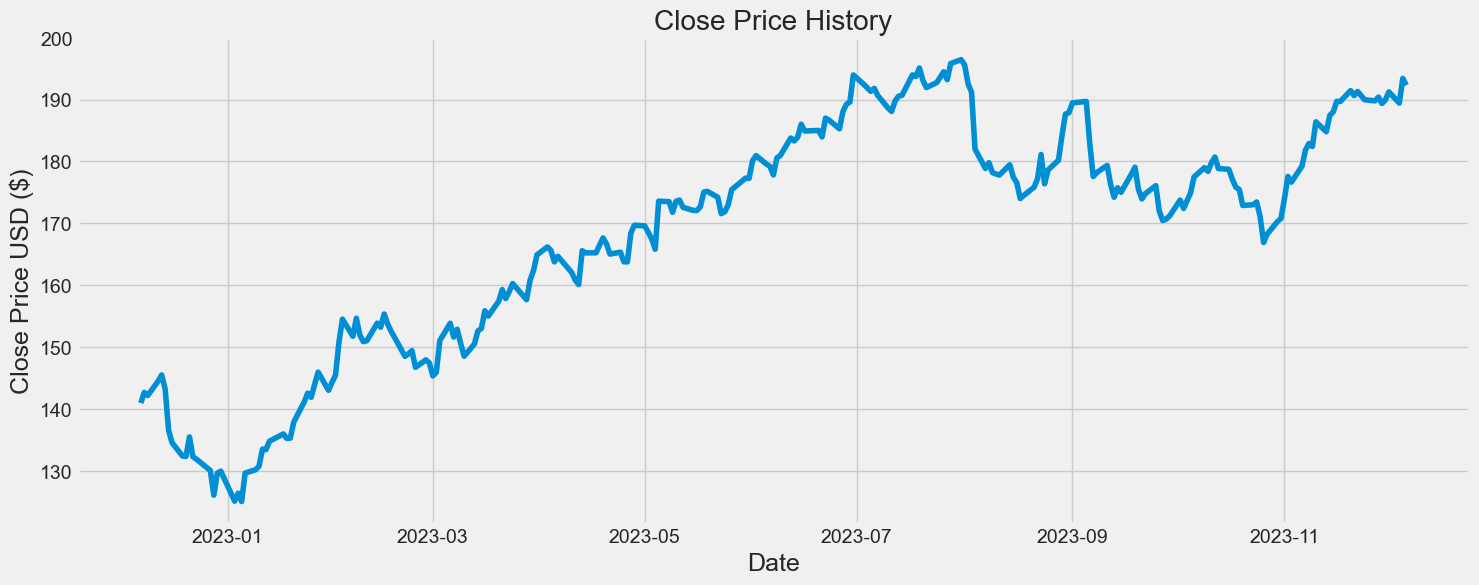

In [21]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

239

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.22875623e-01],
       [2.46815024e-01],
       [2.39955298e-01],
       [2.72574671e-01],
       [2.86294337e-01],
       [2.54655047e-01],
       [1.60716832e-01],
       [1.32857312e-01],
       [1.02897920e-01],
       [1.01918051e-01],
       [1.46017083e-01],
       [1.00937968e-01],
       [9.57581400e-02],
       [7.01386268e-02],
       [1.42797742e-02],
       [6.42587701e-02],
       [6.87385694e-02],
       [7.00028721e-04],
       [1.87596803e-02],
       [0.00000000e+00],
       [6.43986904e-02],
       [7.18185249e-02],
       [7.99383881e-02],
       [1.18577752e-01],
       [1.17457749e-01],
       [1.36357242e-01],
       [1.52877023e-01],
       [1.42657287e-01],
       [1.43497236e-01],
       [1.79896380e-01],
       [2.25255549e-01],
       [2.45135126e-01],
       [2.35755339e-01],
       [2.65154837e-01],
       [2.92734089e-01],
       [2.51715012e-01],
       [2.69774556e-01],
       [2.85734229e-01],
       [3.61192924e-01],
       [4.12711791e-01],


In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.22287562, 0.24681502, 0.2399553 , 0.27257467, 0.28629434,
       0.25465505, 0.16071683, 0.13285731, 0.10289792, 0.10191805,
       0.14601708, 0.10093797, 0.09575814, 0.07013863, 0.01427977,
       0.06425877, 0.06873857, 0.00070003, 0.01875968, 0.        ,
       0.06439869, 0.07181852, 0.07993839, 0.11857775, 0.11745775,
       0.13635724, 0.15287702, 0.14265729, 0.14349724, 0.17989638,
       0.22525555, 0.24513513, 0.23575534, 0.26515484, 0.29273409,
       0.25171501, 0.26977456, 0.28573423, 0.36119292, 0.41271179,
       0.37393251, 0.41481166, 0.37659249, 0.36189274, 0.36385269,
       0.40361206, 0.39451211, 0.42433158, 0.40165211, 0.38541238,
       0.32843342, 0.33445341, 0.34131313, 0.30365407, 0.32059361,
       0.31345383, 0.28405433, 0.29245425, 0.36413275, 0.403332  ])]
[0.3721126886026802]

[array([0.22287562, 0.24681502, 0.2399553 , 0.27257467, 0.28629434,
       0.25465505, 0.16071683, 0.13285731, 0.10289792, 0.10191805,
       0.14601708, 0.10093797, 0.095

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2023-12-07 16:22:15.079946: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.4/lib64
2023-12-07 16:22:15.079983: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-07 16:22:17.000706: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-07 16:22:17.001419: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.4/lib64
2023-12-07 16:22:17.001555: W tensorflow/stream_executor/platform/defaul

179/179 [==============================] - 9s 31ms/step - loss: 0.0154


In [26]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 952ms/step


5.721873829710276

/tmp/ipykernel_26147/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


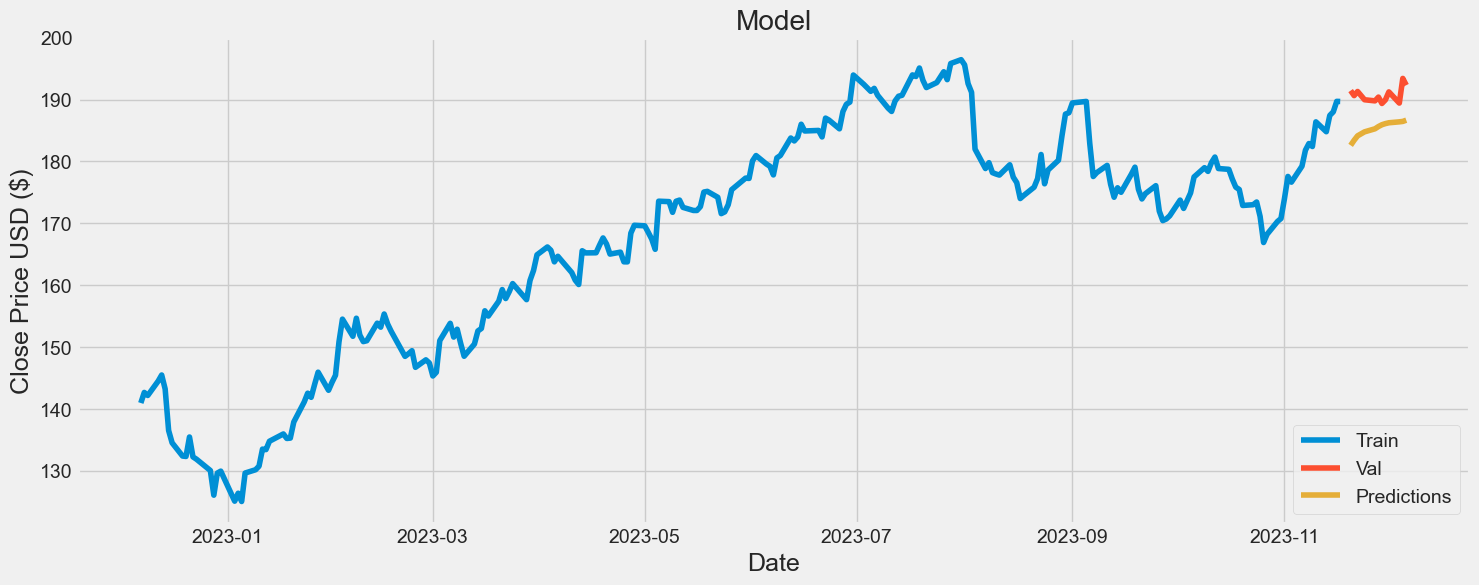

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                                              
2023-11-20 00:00:00-05:00  191.449997   182.596695
2023-11-21 00:00:00-05:00  190.639999   183.417496
2023-11-22 00:00:00-05:00  191.309998   184.136749
2023-11-24 00:00:00-05:00  189.970001   184.780701
2023-11-27 00:00:00-05:00  189.789993   185.274216
2023-11-28 00:00:00-05:00  190.399994   185.640427
2023-11-29 00:00:00-05:00  189.369995   185.933258
2023-11-30 00:00:00-05:00  189.949997   186.114838
2023-12-01 00:00:00-05:00  191.240005   186.247528
2023-12-04 00:00:00-05:00  189.429993   186.398865
2023-12-05 00:00:00-05:00  193.419998   186.467712
2023-12-06 00:00:00-05:00  192.320007   186.668808

# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- How to measure the correlation between stocks.
- How to measure the risk of investing in a particular stock.

Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.

References:
https://www.investopedia.com/terms/c/correlation.asp
[Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)

<p style="background-color:#F1C40F;color:black;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #F1C40F;">Thank youðŸ˜„!!!!!!</p>